In [1]:
## headings
# reference: https://github.com/eriklindernoren/Keras-GAN/blob/master/pix2pix/data_loader.py
import os
import struct
import numpy as np
from glob import glob

In [2]:
class Dataloader():
    def __init__(self, data_path, nt, nr, nph):
        self.data_path = data_path
        self.nt = nt
        self.nr = nr
        self.nph = nph
    
    
    def readin_bin_data(self, data_name):
        out_data = np.empty((self.nt, self.nr))
        FA = open(data_name, "rb")
        FA.seek(3232,0)
        for tt in range(self.nt):
            for rr in range(self.nr):
                data = FA.read(4)
                data_float = struct.unpack("f", data)[0]
                out_data[tt][rr] = data_float
         #np.shape(out_data)   # (4000,301)
    #     cut_data = out_data[0:4000, 8:401]
        return out_data  
    
    
#     def load_data(self, batch_size=1, is_testing=False):
#         data_type = "train" if not is_testing else "test"
# #         path = os.path.join(self.data_path, self.dataset_name)
        
#         return x_data, y_data
    
    
    def load_batch(self, batch_size=1, is_testing=False, ratio=0.5):
        data_type = "train" if not is_testing else "test"
#         path = glob('%s/%s/%s/*' % (self.data_path, self.dataset_name, data_type))
        path = glob('%s/vz/*' % self.data_path)
#         path = glob('./datasets/%s/%s/*' % (self.dataset_name, data_type))
#         path = os.path.join(self.data_path, self.dataset_name)
        
        self.n_batches = int( len(path) / batch_size * ratio )
#         self.n_batches = 1
        
        for i in range(self.n_batches):
#             batch = path[ i * batch_size : (i+1) * batch_size]
#             batch_num = [ i * batch_size : (i+1) * batch_size]
#             x_data, y_data = [], [] ## 用list还是array？
            x_data = np.empty((batch_size, self.nt, self.nr, self.nph)) ## b-4000-300-2, vz, vx
            y_data = np.empty((batch_size, self.nt, self.nr, self.nph)) ## b-4000-300-2, div, curl
            for data_index_local in range(batch_size): ## 0 ~ batchsize-1
                data_index = i * batch_size + data_index_local + 1
                model_num = int( ( int(data_index) - 1 ) / 51) + 1
                source_num = ( int(data_index) - 1 ) % 51 + 1
                if self.nph == 2:
                    for data_phase in ['vz', 'vx']:
                        p_flag = int(data_phase == 'vx')
                        data_name = self.data_path + "/" + data_phase + \
                        "/model" + str(model_num) + "source" + str(source_num) + data_phase + ".bin"
#                         print(data_name)
                        x_data[data_index_local, :, :, p_flag] = self.readin_bin_data(data_name)
                    for data_phase in ['div', 'curl']:
                        p_flag = int(data_phase == 'curl')
                        data_name = self.data_path + "/" + data_phase + \
                        "/model" + str(model_num) + "source" + str(source_num) + data_phase + ".bin"
#                         print(data_name)
                        y_data[data_index_local, :, :, p_flag] = self.readin_bin_data(data_name)
                if self.nph == 1:
                    data_phase = 'vz'
                    data_name = self.data_path + "/" + data_phase + \
                    "/model" + str(model_num) + "source" + str(source_num) + data_phase + ".bin"
                    x_data[data_index_local, :, :, 0] = self.readin_bin_data(data_name)
                    data_phase = 'div'
                    data_name = self.data_path + "/" + data_phase + \
                    "/model" + str(model_num) + "source" + str(source_num) + data_phase + ".bin"
                    y_data[data_index_local, :, :, 0] = self.readin_bin_data(data_name)                    
                yield x_data, y_data

In [6]:
# data_path = "/media/wywdisk/VSPdata/data/haveinvx/layer2_haveinvx"
data_path = "/home/wyw/data/MKDATA/mkvspdata/E28093/E-layer4"
my_data_loader = Dataloader(data_path, 10000, 467, 2)

In [7]:
# my_data_loader.load_batch(batch_size=1, is_testing=False, ratio=0.001)

In [8]:
for batch_i, (x_data, y_data) in enumerate(my_data_loader.load_batch(batch_size=1, is_testing=False, ratio=0.02)):
    print(batch_i)
#     print(x_data.shape, y_data.shape )
#     print(x_data,y_data)
#     a1 = y_predict
#     print("Information of a1 :")
    print("The shape of a1   :",x_data.shape)
    print("The range        : ", [x_data[0,:,:,1].min(),x_data[0,:,:,1].max()])

0
The shape of a1   : (1, 10000, 467, 2)
The range        :  [0.0, 10005.0]
1
The shape of a1   : (1, 10000, 467, 2)
The range        :  [0.0, 10005.0]


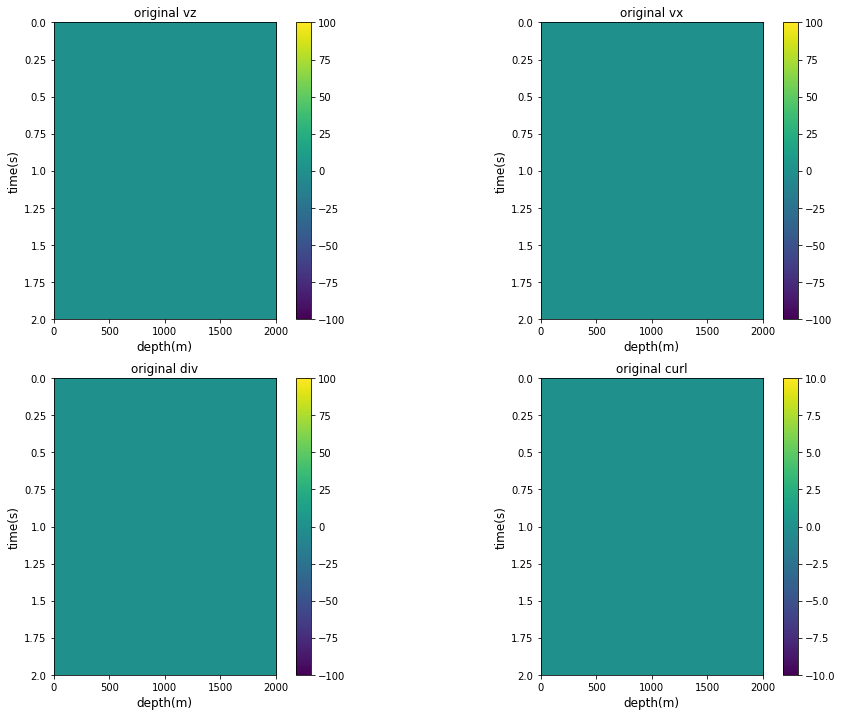

In [11]:
## plot y_predict
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
lines = 2
cols = 2
forts = 12
ss1 = 300
ss2 = 400
value_limit = 100#1e-20

x_libs = [0,0, 500, 1000, 1500, 2000]#np.linspace(0,1500,4)#[0, 500, 1000, 1500]
y_libs = np.linspace(0,2,9)#[0,0.4, 0.8, 1.2, 1.6, 2]

fig, axs = plt.subplots(1,2,figsize=(16, 12), sharey=True)

# obj = 'y_predict'
# im = plt.imshow(eval(obj)[0,:,:,1], extent=[0, 512, 512,0])
# plt.colorbar(im)

# ax1 = plt.subplot(131)
ax1 = plt.subplot(lines,cols,1)
obj = 'x_data'
# print(obj, ": ", eval(obj).shape, "\t", [eval(obj).min(), eval(obj).max()] )
im = plt.imshow(eval(obj)[0,:,:,0], extent=[0, ss1, ss2,0],vmin=-value_limit, vmax=value_limit)
plt.colorbar(im)
# plt.title("The elastic z component of VSP data", fontsize=forts);
plt.title("original vz", fontsize=forts);
plt.xlabel('depth(m)', fontsize=forts);
plt.ylabel('time(s)', fontsize=forts);
ax1.xaxis.set_major_locator(MultipleLocator(75))
ax1.xaxis.set(ticklabels=x_libs)#[0,300,600, 900, 1200, 1500]);
ax1.yaxis.set(ticklabels=y_libs)#[0,0.4, 0.8, 1.2, 1.6, 2]);
plt.setp(ax1.get_xticklabels(), fontsize=10);
# plt.tight_layout()

# ax1 = plt.subplot(131)
ax2 = plt.subplot(lines,cols,2)
obj = 'x_data'
# print(obj, ": ", eval(obj).shape, "\t", [eval(obj).min(), eval(obj).max()] )
im = plt.imshow(eval(obj)[0,:,:,1], extent=[0, ss1, ss2,0],vmin=-value_limit, vmax=value_limit)
plt.colorbar(im)
# plt.title("The elastic z component of VSP data", fontsize=forts);
plt.title("original vx", fontsize=forts);
plt.xlabel('depth(m)', fontsize=forts);
plt.ylabel('time(s)', fontsize=forts);
# ax1 = fig.add_subplot(131)
ax2.xaxis.set_major_locator(MultipleLocator(75))
ax2.xaxis.set(ticklabels=x_libs)#[0,300,600, 900, 1200, 1500]);
ax2.yaxis.set(ticklabels=y_libs)#[0,0.4, 0.8, 1.2, 1.6, 2]);
plt.setp(ax2.get_xticklabels(), fontsize=10);
# plt.tight_layout()

# ax1 = plt.subplot(131)
ax3 = plt.subplot(lines,cols,3)
obj = 'y_data'
# print(obj, ": ", eval(obj).shape, "\t", [eval(obj).min(), eval(obj).max()] )
im = plt.imshow(eval(obj)[0,:,:,0], extent=[0, ss1, ss2,0],vmin=-value_limit, vmax=value_limit)
plt.colorbar(im)
# plt.title("The elastic z component of VSP data", fontsize=forts);
plt.title("original div", fontsize=forts);
plt.xlabel('depth(m)', fontsize=forts);
plt.ylabel('time(s)', fontsize=forts);
# ax1 = fig.add_subplot(131)
ax3.xaxis.set_major_locator(MultipleLocator(75))
ax3.xaxis.set(ticklabels=x_libs)#[0,300,600, 900, 1200, 1500]);
ax3.yaxis.set(ticklabels=y_libs)#[0,0.4, 0.8, 1.2, 1.6, 2]);
plt.setp(ax3.get_xticklabels(), fontsize=10);
# plt.tight_layout()

# ax1 = plt.subplot(131)
ax4 = plt.subplot(lines,cols,4)
obj = 'y_data'
# print(obj, ": ", eval(obj).shape, "\t", [eval(obj).min(), eval(obj).max()] )
im = plt.imshow(eval(obj)[0,:,:,1], extent=[0, ss1, ss2,0],vmin=-0.1*value_limit, vmax=0.1*value_limit)
plt.colorbar(im)
# plt.title("The elastic z component of VSP data", fontsize=forts);
plt.title("original curl", fontsize=forts);
plt.xlabel('depth(m)', fontsize=forts);
plt.ylabel('time(s)', fontsize=forts);
# ax1 = fig.add_subplot(131)
ax4.xaxis.set_major_locator(MultipleLocator(75))
ax4.xaxis.set(ticklabels=x_libs)#[0,300,600, 900, 1200, 1500]);
ax4.yaxis.set(ticklabels=y_libs)#[0,0.4, 0.8, 1.2, 1.6, 2]);
plt.setp(ax4.get_xticklabels(), fontsize=10);
# plt.tight_layout()

